In [29]:
import os
import pandas as pd 
import numpy as np

In [30]:
csv_file = '/Users/ananyasingh/Desktop/Overtime EDA/combined_data.csv'
df = pd.read_csv(csv_file)
print(df.head())

/var/folders/2k/zvx0_bwd0wbdc5nb52hxwyxm0000gn/T/ipykernel_42318/3125590837.py:2: DtypeWarning: Columns (1,2,4,6,7,9,13,18,20,21,22,27,29,30,31,32,33,34,35,37,38,39,43,49,51,52,56,58,61,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


        ID                 NAME   RANK  ASSIGNED  \
0  11735.0         Sanchez,Rene    Ptl   47120.0   
1  11204.0      Fisher,Joseph R    Ptl   47120.0   
2  12274.0      O'Brien,Scott W  Sergt   47110.0   
3   9302.0  Stevens,Frederick J    Ptl   47110.0   
4  11706.0     Knight,William E    Ptl   47110.0   

                   ASSIGNED_DESC  CHARGED    CHARGED_DESC      OTDATE  OTCODE  \
0                    CANINE UNIT  41010.0     DISTRICT 01  2012-03-02   401.0   
1                    CANINE UNIT  41010.0     DISTRICT 01  2012-03-02   401.0   
2  MOBILE OPERATIONS PATROL UNIT  48110.0  SPECIAL EVENTS  2012-05-13   401.0   
3  MOBILE OPERATIONS PATROL UNIT  48110.0  SPECIAL EVENTS  2012-05-13   401.0   
4  MOBILE OPERATIONS PATROL UNIT  48110.0  SPECIAL EVENTS  2012-05-13   401.0   

          DESCRIPTION  ...  Detail_Type  Detail_Rank  Admin_Fee_Flag  \
0  A1 COMMUNITY EVENT  ...          NaN          NaN             NaN   
1  A1 COMMUNITY EVENT  ...          NaN          NaN    

In [31]:
print(df.columns)

Index(['ID', 'NAME', 'RANK', 'ASSIGNED', 'ASSIGNED_DESC', 'CHARGED',
       'CHARGED_DESC', 'OTDATE', 'OTCODE', 'DESCRIPTION', 'STARTTIME',
       'ENDTIME', 'OTHOURS', 'DESCRIPTIONS', 'TYPE', 'Source_File',
       'Tracking_No', 'Emp. ID', 'Employee', 'Rank', 'Street', 'xStreet',
       'Detail\nDate', 'Start\nTime', 'End \nTime', 'Hours\nWorked',
       'Hours\nPaid', 'Type', 'Customer No.', 'Customer', 'Customer Address',
       'Customer Address 1', 'Customer Address 3', 'Customer_City',
       'Customer_State', 'Customer_zip', 'Job No.', 'Location', 'Address',
       'City/State/Zip', 'WRKDHRS', 'RowId', 'Emp_No', 'Emp_Name', 'Emp_Rank',
       'Emp_Org_Code', 'District_Worked', 'Customer_No', 'Customer_Seq',
       'Customer_No_And_Seq', 'BPD_Customer_no', 'Street_No', 'Start_date',
       'Start_Time', 'End_Time', 'Hours_Worked', 'Detail_Type', 'Detail_Rank',
       'Admin_Fee_Flag', 'Pay_Hours', 'Pay_Amount', 'Pay_TRC_Code', 'Pay_Rate',
       'FBK_Pay_Date', 'IDNO6', 'c'],
   

In [8]:
print(df.columns.isnull().sum())

0


In [32]:
id_columns =['ID', 'Emp_No', 'Emp. ID', 'IDNO6' ]
print(df[id_columns].head(10))

        ID  Emp_No  Emp. ID  IDNO6
0  11735.0     NaN      NaN    NaN
1  11204.0     NaN      NaN    NaN
2  12274.0     NaN      NaN    NaN
3   9302.0     NaN      NaN    NaN
4  11706.0     NaN      NaN    NaN
5  11739.0     NaN      NaN    NaN
6  12282.0     NaN      NaN    NaN
7  82754.0     NaN      NaN    NaN
8  10453.0     NaN      NaN    NaN
9  44946.0     NaN      NaN    NaN


In [33]:
non_null_counts = df[id_columns].count()
non_null_percentages = (df[id_columns].count()/len(df))*100
print(non_null_counts)
print(non_null_percentages)

ID          126245
Emp_No      205968
Emp. ID    1072494
IDNO6        49519
dtype: int64
ID          8.681250
Emp_No     14.163411
Emp. ID    73.750160
IDNO6       3.405179
dtype: float64


In [34]:
df['Employee_ID'] = None
df['Employee_ID'] = df['Emp. ID']
df.loc[df['Employee_ID'].isna(), 'Employee_ID'] = df['Emp_No']
df.loc[df['Employee_ID'].isna(), 'Employee_ID'] = df['ID']
df.loc[df['Employee_ID'].isna(), 'Employee_ID'] = df['IDNO6']

coverage = df['Employee_ID'].count() / len(df) * 100
print(f"Consolidated ID column coverage: {coverage:.2f}%")


Consolidated ID column coverage: 100.00%


In [35]:
df = df.drop(['ID', 'Emp_No', 'Emp. ID', 'IDNO6'], axis = 1)

In [38]:
num_columns = len(df.columns)
print(num_columns)

63


In [40]:
# Function to consolidate columns into a single column
def consolidate_columns(df, new_column_name, column_list):
    """
    Consolidates multiple columns into a single column, prioritizing by order in the list.
    
    Parameters:
    df: DataFrame containing the columns
    new_column_name: Name for the consolidated column
    column_list: List of column names to consolidate, in priority order
    
    Returns:
    The modified DataFrame with the new consolidated column
    """
    # Create the new column
    df[new_column_name] = None
    
    # Fill in values from each column in priority order
    for col in column_list:
        if col in df.columns:  # Only use columns that exist
            df.loc[df[new_column_name].isna(), new_column_name] = df[col]
    
    # Calculate and print coverage
    coverage = df[new_column_name].count() / len(df) * 100
    print(f"{new_column_name} coverage: {coverage:.2f}%")
    
    return df

# Apply consolidation to each group of duplicate columns

# 1. Officer Name Columns
name_columns = ['NAME', 'Employee', 'Emp_Name']
df = consolidate_columns(df, 'officer_name', name_columns)

# 2. Rank Columns
rank_columns = ['RANK', 'Rank', 'Emp_Rank', 'Detail_Rank']
df = consolidate_columns(df, 'officer_rank', rank_columns)

# 3. Assignment/District Columns
assignment_columns = ['ASSIGNED', 'ASSIGNED_DESC', 'CHARGED', 'CHARGED_DESC', 
                      'Emp_Org_Code', 'District_Worked']
df = consolidate_columns(df, 'officer_assignment', assignment_columns)

# 4. Date Columns
date_columns = ['OTDATE', 'Detail\nDate', 'Start_date']
df = consolidate_columns(df, 'overtime_date', date_columns)

# 5. Start Time Columns
start_time_columns = ['STARTTIME', 'Start\nTime', 'Start_Time']
df = consolidate_columns(df, 'start_time', start_time_columns)

# 6. End Time Columns
end_time_columns = ['ENDTIME', 'End \nTime', 'End_Time']
df = consolidate_columns(df, 'end_time', end_time_columns)

# 7. Hours Worked Columns
hours_columns = ['OTHOURS', 'Hours\nWorked', 'Hours_Worked', 'WRKDHRS', 
                 'Hours\nPaid', 'Pay_Hours']
df = consolidate_columns(df, 'hours_worked', hours_columns)

# 8. Customer Number Columns
customer_number_columns = ['Customer No.', 'Customer_No', 'BPD_Customer_no', 
                           'Customer_No_And_Seq']
df = consolidate_columns(df, 'customer_number', customer_number_columns)

# 9. Customer Name Columns
customer_name_columns = ['Customer']
df = consolidate_columns(df, 'customer_name', customer_name_columns)

# 10. Location/Address Columns
address_columns = ['Street', 'xStreet', 'Location', 'Address', 'City/State/Zip', 
                   'Customer Address', 'Customer Address 1', 'Customer Address 3']
df = consolidate_columns(df, 'location_address', address_columns)

# 11. Customer Location Components
customer_location_columns = ['Customer_City', 'Customer_State', 'Customer_zip']
for col in customer_location_columns:
    if col in df.columns:
        # Keep these separate as they represent components of an address
        pass  # Just checking they exist, but keeping them separate

# 12. Type of Work Columns
type_columns = ['TYPE', 'Type', 'Detail_Type', 'DESCRIPTION', 'DESCRIPTIONS']
df = consolidate_columns(df, 'overtime_type', type_columns)

# 13. Payment Related Columns
payment_columns = ['Pay_Amount', 'Pay_Rate', 'Pay_TRC_Code']
for col in payment_columns:
    if col in df.columns:
        # These are likely different types of information, so keep separate
        pass

# Define the mapping of consolidated columns to original columns
consolidated_mapping = {
    'officer_name': name_columns,
    'officer_rank': rank_columns,
    'officer_assignment': assignment_columns,
    'overtime_date': date_columns,
    'start_time': start_time_columns,
    'end_time': end_time_columns,
    'hours_worked': hours_columns,
    'customer_number': customer_number_columns,
    'customer_name': customer_name_columns,
    'location_address': address_columns,
    'overtime_type': type_columns
}

# MODIFIED: Drop all the redundant columns
columns_to_drop = []
for orig_cols in consolidated_mapping.values():
    columns_to_drop.extend(orig_cols)

# Only drop columns that exist
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Use inplace=True to avoid reassignment issues
df.drop(columns=columns_to_drop, inplace=True)

# Print the resulting column structure
print("\nFinal consolidated DataFrame has these columns:")
print(df.columns.tolist())

# Check the number of columns after consolidation
print(f"\nNumber of columns after consolidation: {len(df.columns)}")

officer_name coverage: 100.00%
officer_rank coverage: 100.00%


/var/folders/2k/zvx0_bwd0wbdc5nb52hxwyxm0000gn/T/ipykernel_42318/1703355703.py:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[df[new_column_name].isna(), new_column_name] = df[col]


officer_assignment coverage: 26.25%
overtime_date coverage: 100.00%
start_time coverage: 100.00%
end_time coverage: 100.00%
hours_worked coverage: 100.00%
customer_number coverage: 87.91%
customer_name coverage: 73.75%
location_address coverage: 87.91%
overtime_type coverage: 100.00%

Final consolidated DataFrame has these columns:
['OTCODE', 'Source_File', 'Tracking_No', 'Customer_City', 'Customer_State', 'Customer_zip', 'Job No.', 'RowId', 'Customer_Seq', 'Street_No', 'Admin_Fee_Flag', 'Pay_Amount', 'Pay_TRC_Code', 'Pay_Rate', 'FBK_Pay_Date', 'c', 'Employee_ID', 'officer_name', 'officer_rank', 'officer_assignment', 'overtime_date', 'start_time', 'end_time', 'hours_worked', 'customer_number', 'customer_name', 'location_address', 'overtime_type']

Number of columns after consolidation: 28


In [42]:
num_columns = len(df.columns)
print(num_columns)

28


In [44]:
# Check data types and missing values
print(df.dtypes)
print(df.isnull().sum())

# Check for any remaining duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

OTCODE                float64
Source_File            object
Tracking_No           float64
Customer_City          object
Customer_State         object
Customer_zip           object
Job No.               float64
RowId                 float64
Customer_Seq          float64
Street_No              object
Admin_Fee_Flag         object
Pay_Amount            float64
Pay_TRC_Code           object
Pay_Rate              float64
FBK_Pay_Date           object
c                     float64
Employee_ID           float64
officer_name           object
officer_rank           object
officer_assignment     object
overtime_date          object
start_time            float64
end_time              float64
hours_worked          float64
customer_number        object
customer_name          object
location_address       object
overtime_type          object
dtype: object
OTCODE                1278462
Source_File                 0
Tracking_No            542805
Customer_City          638058
Customer_State         638

In [45]:
# Check the format of overtime_date
print(df['overtime_date'].head())

# Convert date to proper datetime
try:
    df['overtime_date'] = pd.to_datetime(df['overtime_date'], errors='coerce')
    
    # Extract time components
    df['year'] = df['overtime_date'].dt.year
    df['month'] = df['overtime_date'].dt.month
    df['day_of_week'] = df['overtime_date'].dt.day_name()
    
    print("Date conversion successful")
except Exception as e:
    print(f"Error converting dates: {e}")
    
# Check time formats - they appear to be numeric values, not time strings
print(df[['start_time', 'end_time']].head())

0    2012-03-02
1    2012-03-02
2    2012-05-13
3    2012-05-13
4    2012-05-13
Name: overtime_date, dtype: object
Date conversion successful
   start_time  end_time
0      1030.0    1430.0
1      1030.0    1430.0
2      1000.0    1500.0
3      1000.0    1500.0
4      1000.0    1500.0


In [46]:
# If your times are in datetime format, calculate duration
if pd.api.types.is_datetime64_dtype(df['start_time']) and pd.api.types.is_datetime64_dtype(df['end_time']):
    df['calculated_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 3600
    
    # Compare calculated vs reported hours
    df['hours_difference'] = df['calculated_duration'] - df['hours_worked']
    print(df['hours_difference'].describe())

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

count    1.454226e+06
mean     3.887951e+02
std      2.925877e+02
min      0.000000e+00
25%      8.000000e+00
50%      5.000000e+02
75%      6.150000e+02
max      1.800000e+03
Name: hours_worked, dtype: float64


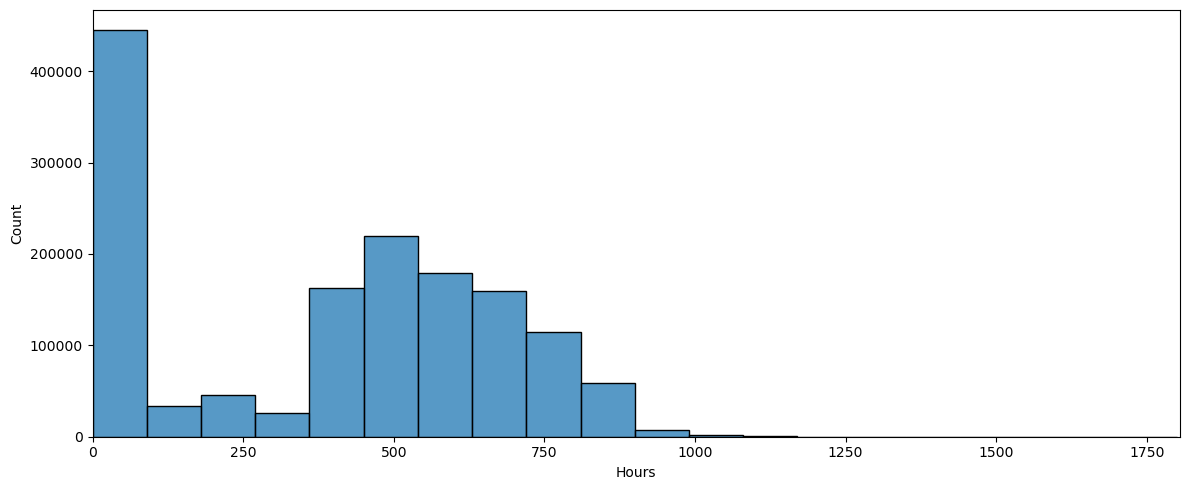

In [54]:
print(df['hours_worked'].describe())
max_value = df['hours_worked'].max()
plt.figure(figsize=(12,5))
sns.histplot(df['hours_worked'], bins=20)
plt.xlim(0, max_value+5)
plt.xlabel('Hours')
plt.tight_layout()
plt.show()

                count        mean           sum  median
officer_rank                                           
9.0           1006046  440.011198  4.426715e+08  500.00
7.0            108985  455.413661  4.963326e+07  530.00
8.0             89133  426.260635  3.799389e+07  500.00
6.0             30071  463.340331  1.393311e+07  530.00
5.0             29201  461.119466  1.346515e+07  530.00
3.0              9580  497.976017  4.770610e+06  600.00
4.0              5442  385.775759  2.099392e+06  400.00
Ptl             95288    4.765067  4.540538e+05    4.00
Det             48210    4.608479  2.221748e+05    4.00
SgtDet          12430    4.701488  5.843950e+04    4.00
Sergt           10521    4.889768  5.144525e+04    4.00
Civili           5355    4.460924  2.388825e+04    4.00
Lieut            1819    5.413139  9.846500e+03    4.00
Capt             1108    4.600857  5.097750e+03    4.00
LtDet            1033    3.934414  4.064250e+03    4.00
2.0                 2    5.500000  1.100000e+01 

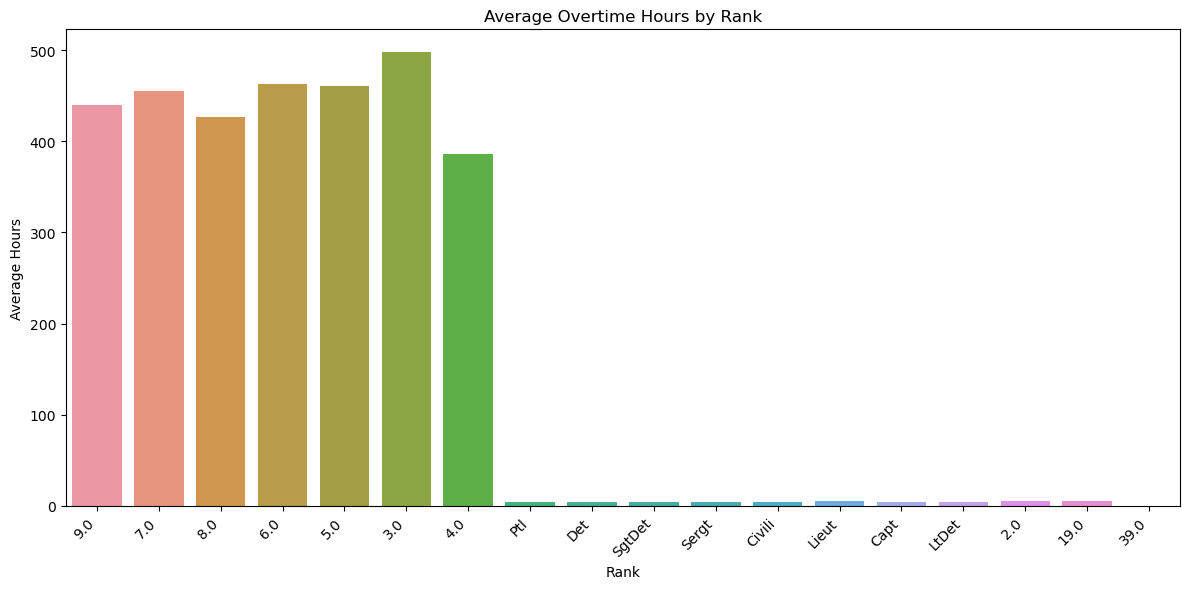

In [55]:
# Group by officer rank and analyze overtime
rank_stats = df.groupby('officer_rank')['hours_worked'].agg(['count', 'mean', 'sum', 'median'])
rank_stats = rank_stats.sort_values('sum', ascending=False)
print(rank_stats)

# Visualize average overtime by rank
plt.figure(figsize=(12, 6))
sns.barplot(x=rank_stats.index, y=rank_stats['mean'])
plt.title('Average Overtime Hours by Rank')
plt.xlabel('Rank')
plt.ylabel('Average Hours')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

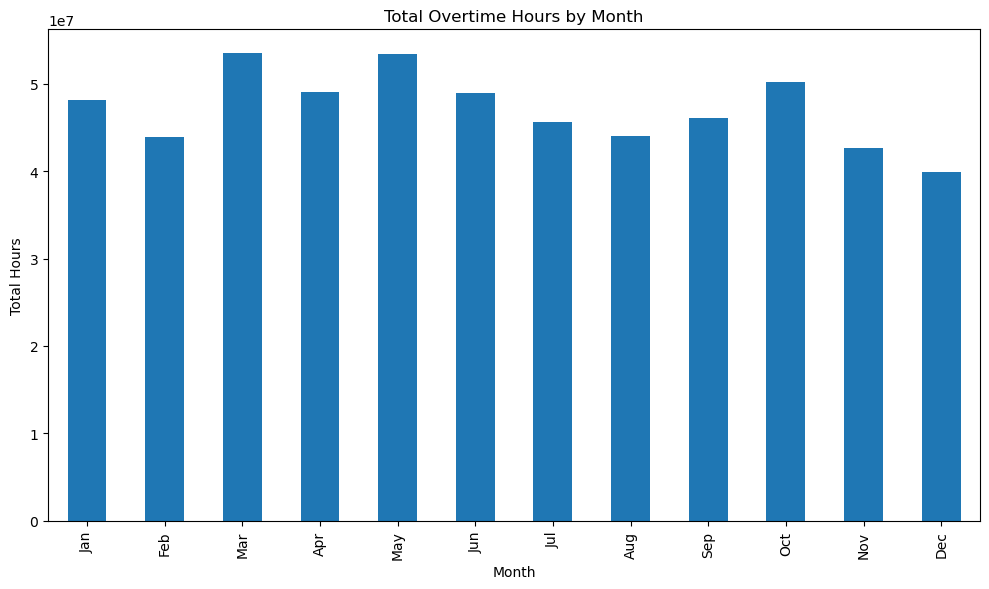

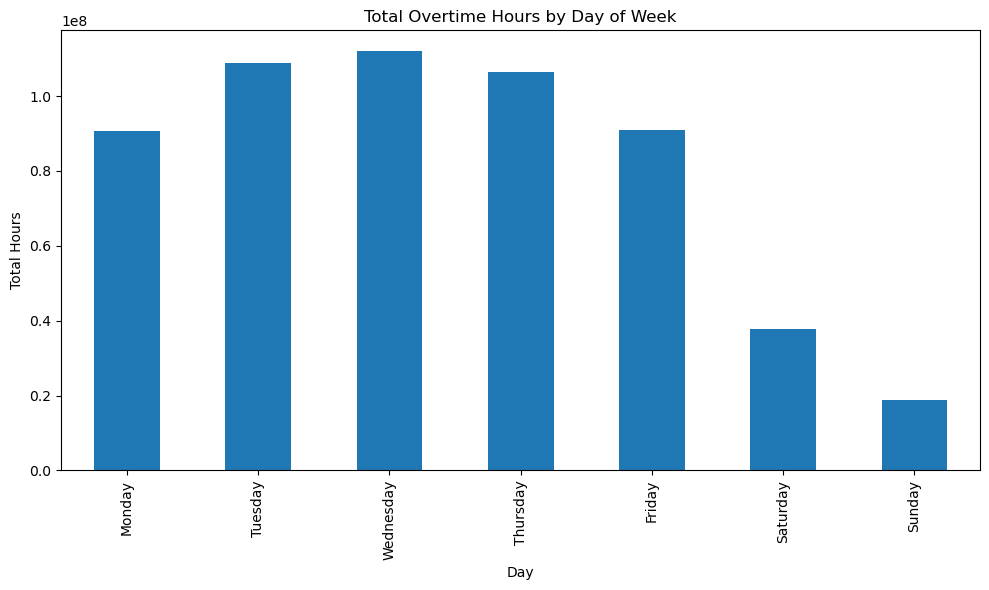

In [56]:
# After converting date, analyze overtime patterns by month
if pd.api.types.is_datetime64_dtype(df['overtime_date']):
    monthly_ot = df.groupby(df['overtime_date'].dt.month)['hours_worked'].sum()
    
    plt.figure(figsize=(10, 6))
    monthly_ot.plot(kind='bar')
    plt.title('Total Overtime Hours by Month')
    plt.xlabel('Month')
    plt.ylabel('Total Hours')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.tight_layout()
    plt.show()
    
    # Analyze by day of week
    dow_ot = df.groupby(df['overtime_date'].dt.day_name())['hours_worked'].sum()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_ot = dow_ot.reindex(day_order)
    
    plt.figure(figsize=(10, 6))
    dow_ot.plot(kind='bar')
    plt.title('Total Overtime Hours by Day of Week')
    plt.xlabel('Day')
    plt.ylabel('Total Hours')
    plt.tight_layout()
    plt.show()

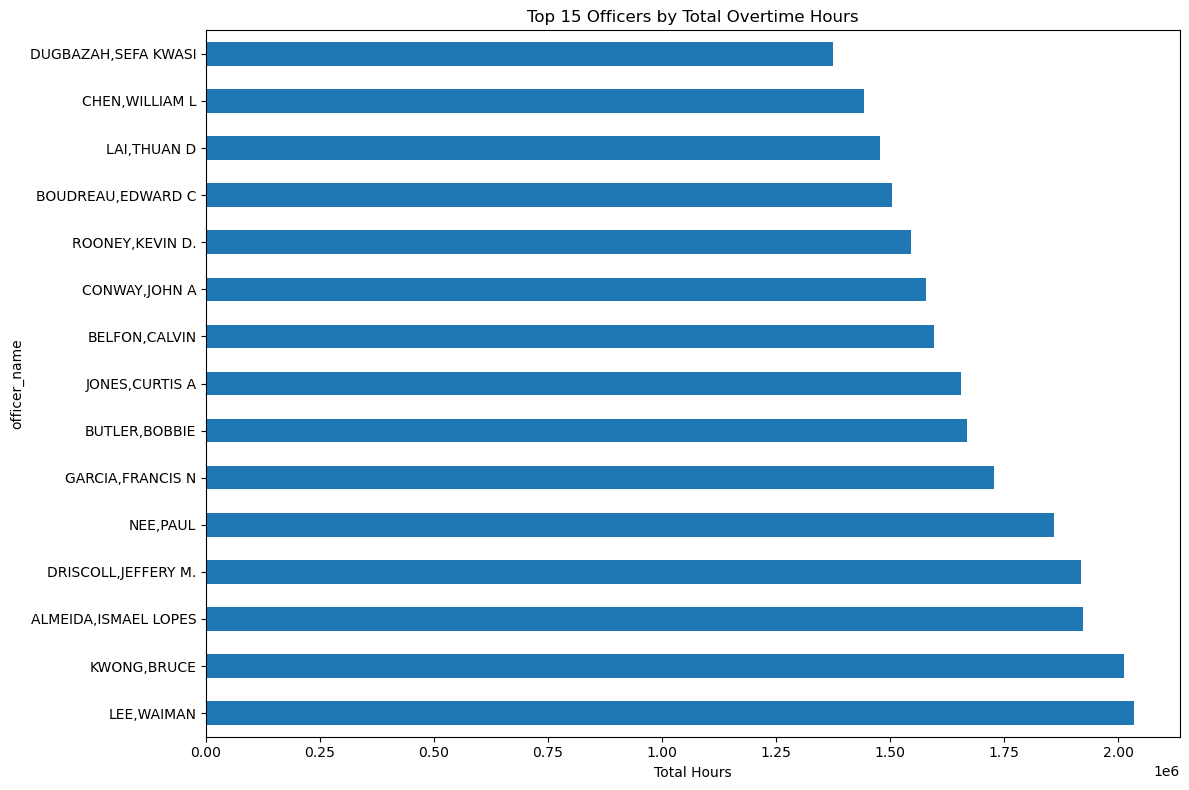

In [57]:
# Top officers by overtime
top_officers = df.groupby('officer_name')['hours_worked'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
top_officers.plot(kind='barh')
plt.title('Top 15 Officers by Total Overtime Hours')
plt.xlabel('Total Hours')
plt.tight_layout()
plt.show()

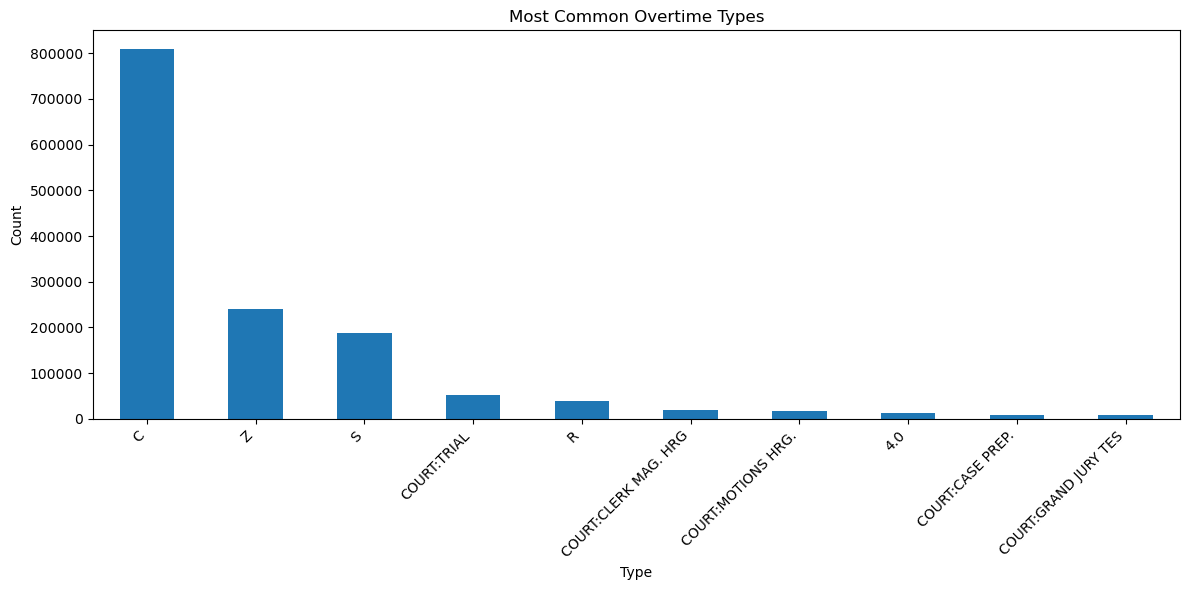

In [58]:
# Most common overtime types
type_counts = df['overtime_type'].value_counts().head(10)

plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar')
plt.title('Most Common Overtime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Number of unique officers: 6002
Officers in the top 5% by number of overtime shifts: 301
                      count         sum        mean
officer_name                                       
LEE,WAIMAN             4410  2034157.38  461.260177
KELLEY,ALLAN G.        4378  1332044.25  304.258623
KWONG,BRUCE            4375  2013435.40  460.213806
ALMEIDA,ISMAEL LOPES   4339  1922646.02  443.108094
CHEN,WILLIAM L         4012  1441854.73  359.385526


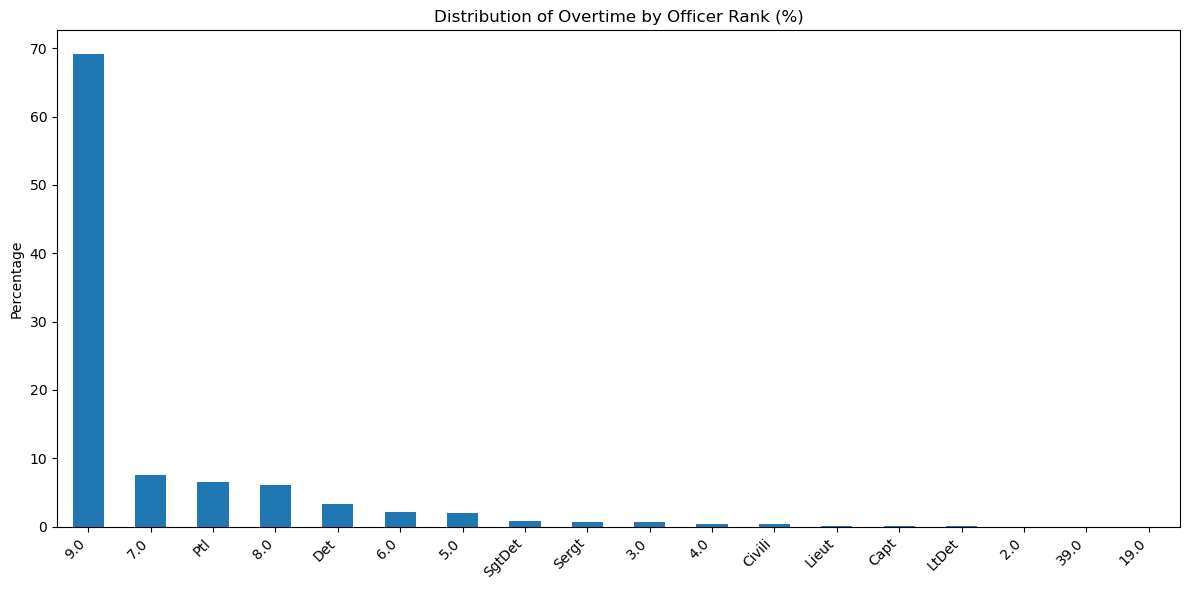

In [59]:
# Analyze overtime distribution by officer
officer_ot = df.groupby('officer_name')['hours_worked'].agg(['count', 'sum', 'mean'])
print(f"Number of unique officers: {len(officer_ot)}")

# Find officers with extreme workloads
high_volume_officers = officer_ot[officer_ot['count'] > officer_ot['count'].quantile(0.95)]
print(f"Officers in the top 5% by number of overtime shifts: {len(high_volume_officers)}")
print(high_volume_officers.sort_values('count', ascending=False).head())

# Rank distribution
rank_distribution = df['officer_rank'].value_counts(normalize=True) * 100
plt.figure(figsize=(12, 6))
rank_distribution.plot(kind='bar')
plt.title('Distribution of Overtime by Officer Rank (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

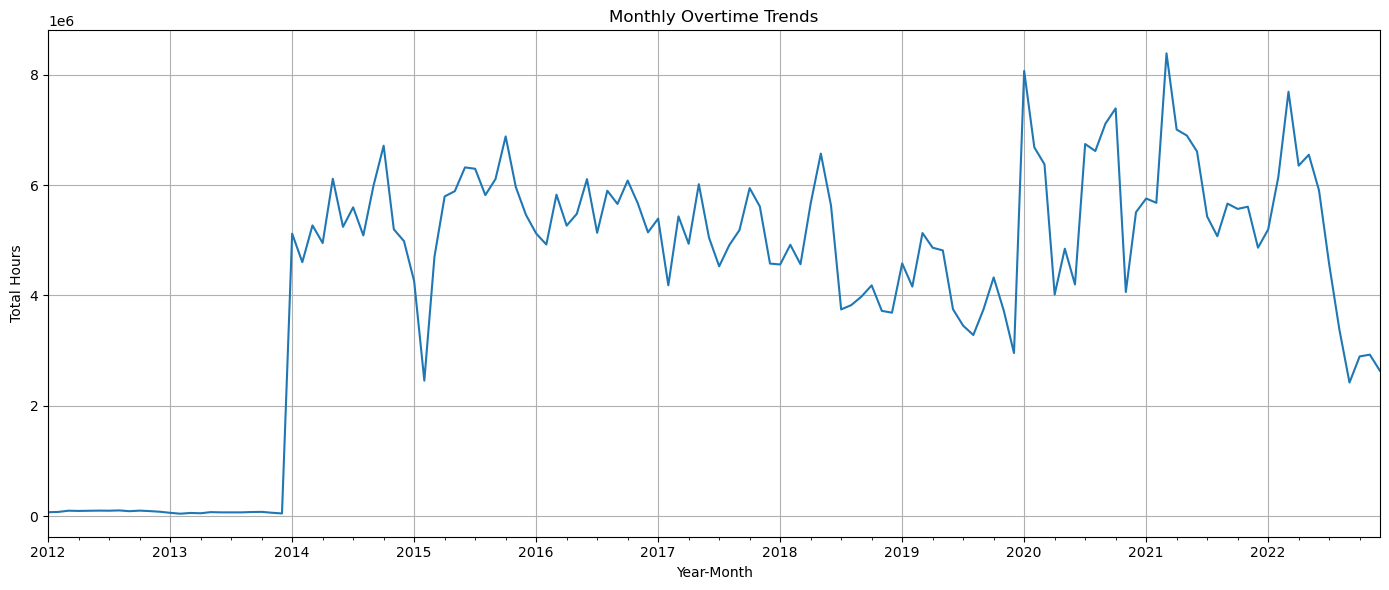

/var/folders/2k/zvx0_bwd0wbdc5nb52hxwyxm0000gn/T/ipykernel_42318/2329353568.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

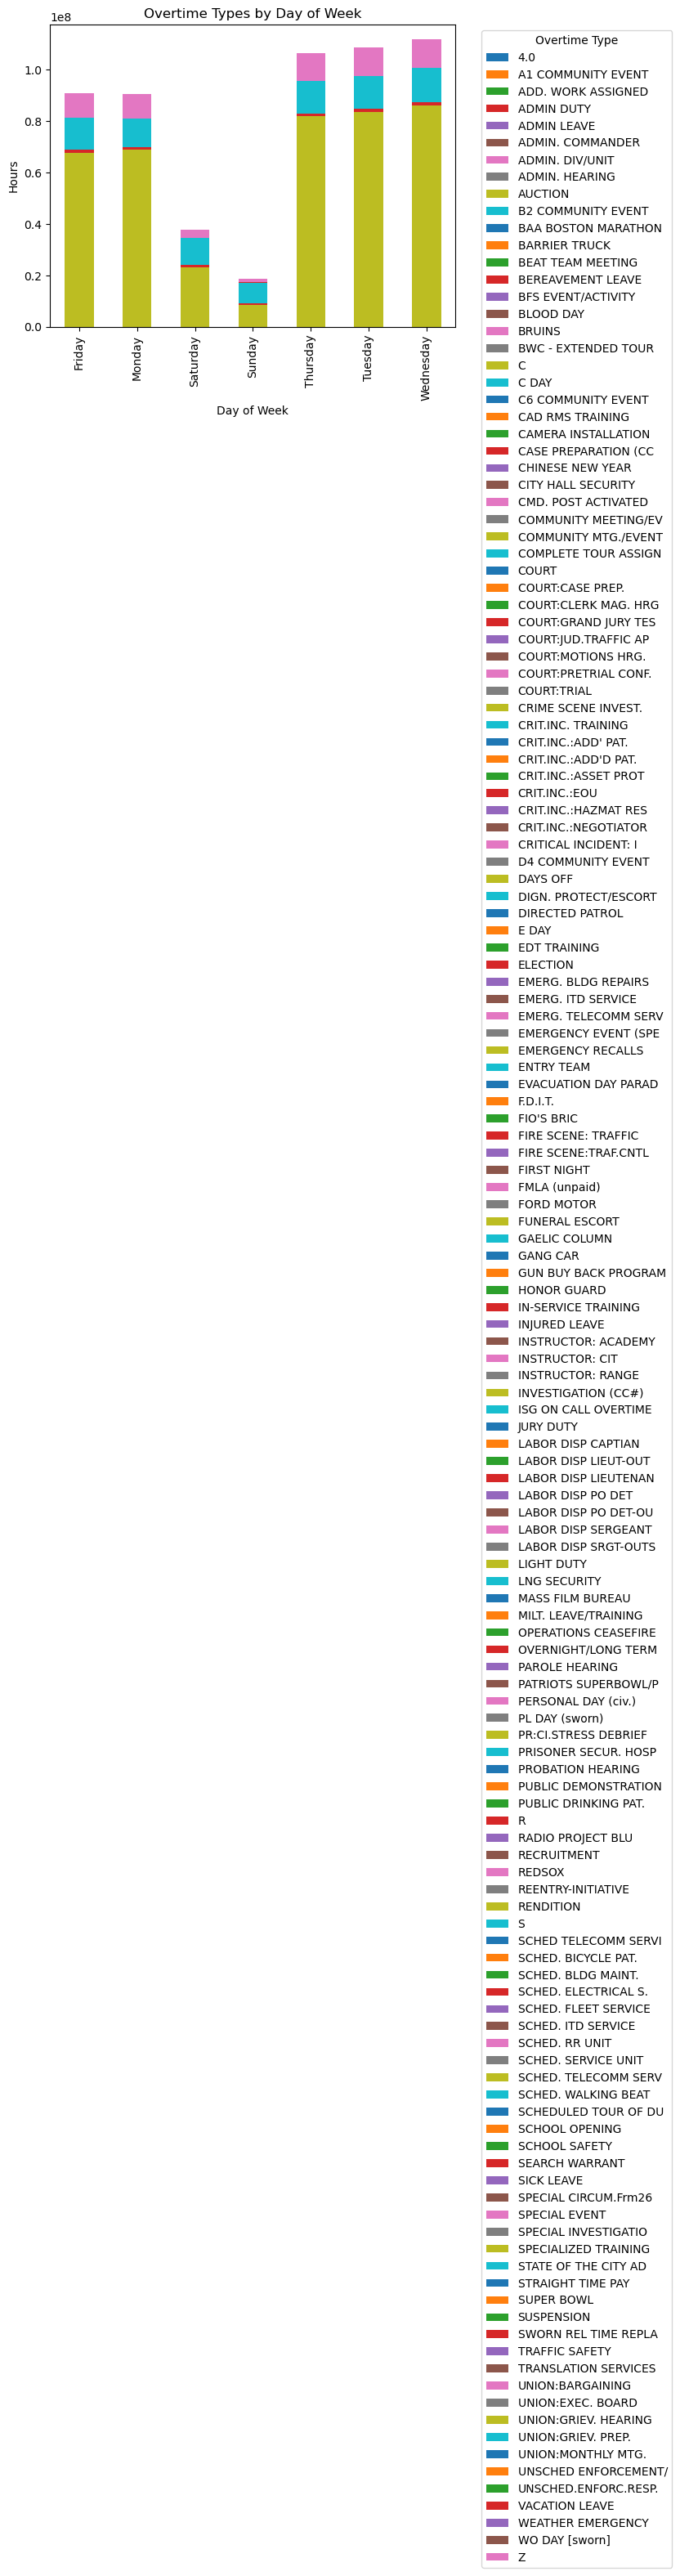

In [60]:
# Convert overtime_date if not already converted
if not pd.api.types.is_datetime64_dtype(df['overtime_date']):
    df['overtime_date'] = pd.to_datetime(df['overtime_date'], errors='coerce')
    
# Create year-month column for time series
df['year_month'] = df['overtime_date'].dt.to_period('M')

# Monthly overtime trends
monthly_overtime = df.groupby('year_month')['hours_worked'].sum()
plt.figure(figsize=(14, 6))
monthly_overtime.plot()
plt.title('Monthly Overtime Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

# Check for day of week patterns
dow_patterns = df.groupby([df['overtime_date'].dt.day_name(), 'overtime_type'])['hours_worked'].sum().unstack()
plt.figure(figsize=(14, 8))
dow_patterns.plot(kind='bar', stacked=True)
plt.title('Overtime Types by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hours')
plt.legend(title='Overtime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

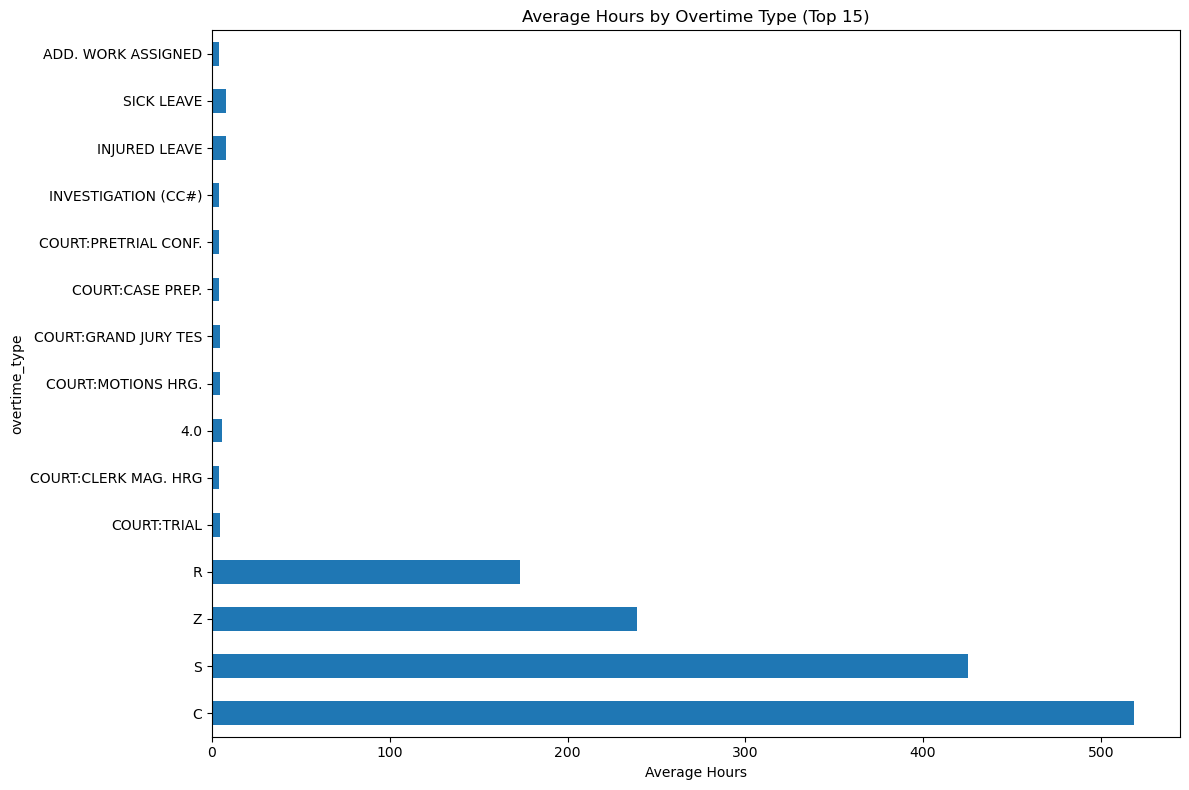

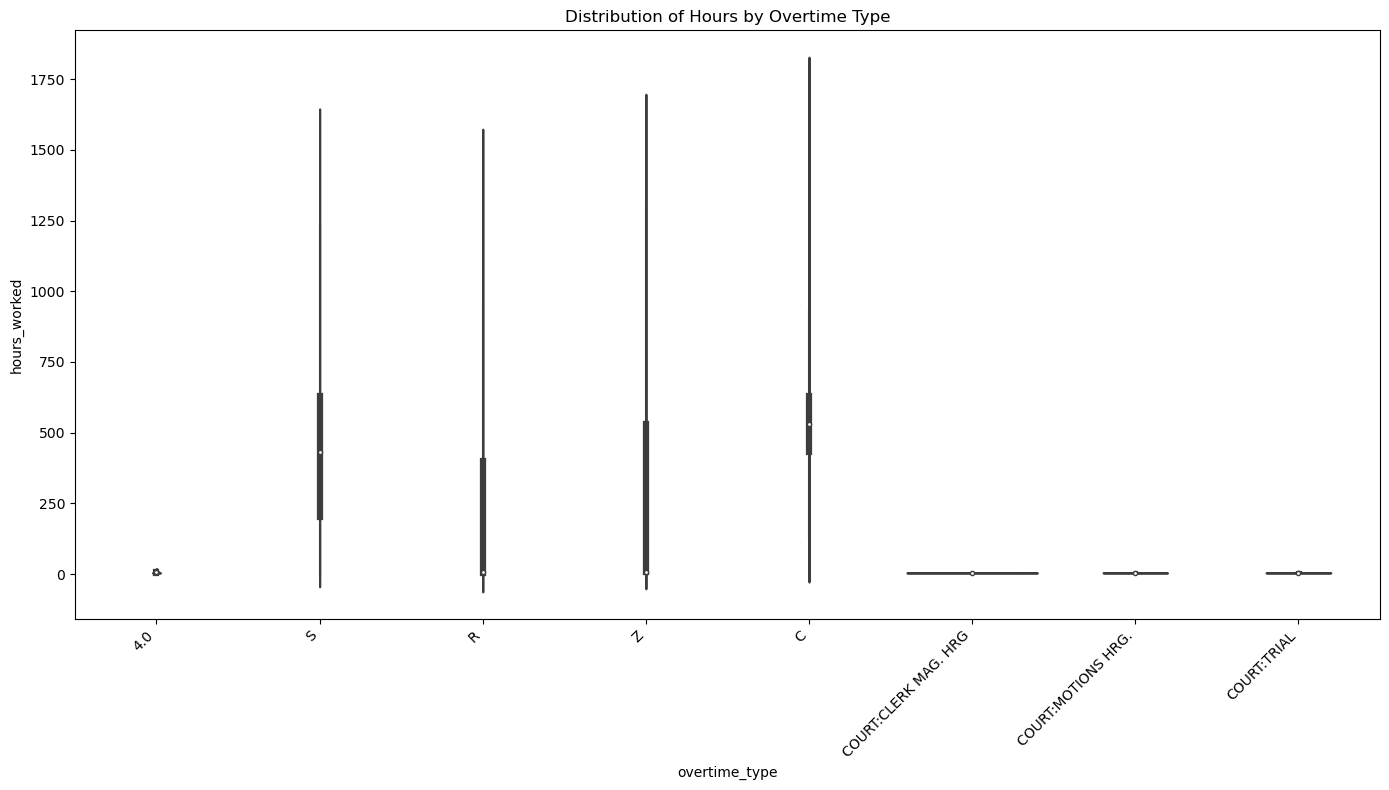

In [61]:
# Analyze relationship between overtime type and hours
type_duration = df.groupby('overtime_type')['hours_worked'].agg(['count', 'mean', 'sum'])
type_duration = type_duration.sort_values('sum', ascending=False)

# Plot average hours by type
plt.figure(figsize=(12, 8))
type_duration['mean'].head(15).plot(kind='barh')
plt.title('Average Hours by Overtime Type (Top 15)')
plt.xlabel('Average Hours')
plt.tight_layout()
plt.show()

# Violin plot to see distribution within types
plt.figure(figsize=(14, 8))
top_types = df['overtime_type'].value_counts().head(8).index
sns.violinplot(x='overtime_type', y='hours_worked', data=df[df['overtime_type'].isin(top_types)])
plt.title('Distribution of Hours by Overtime Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Percentage of rows with payment data: 14.16%


/var/folders/2k/zvx0_bwd0wbdc5nb52hxwyxm0000gn/T/ipykernel_42318/1860942605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_df['hourly_rate'] = payment_df['Pay_Amount'] / payment_df['hours_worked']


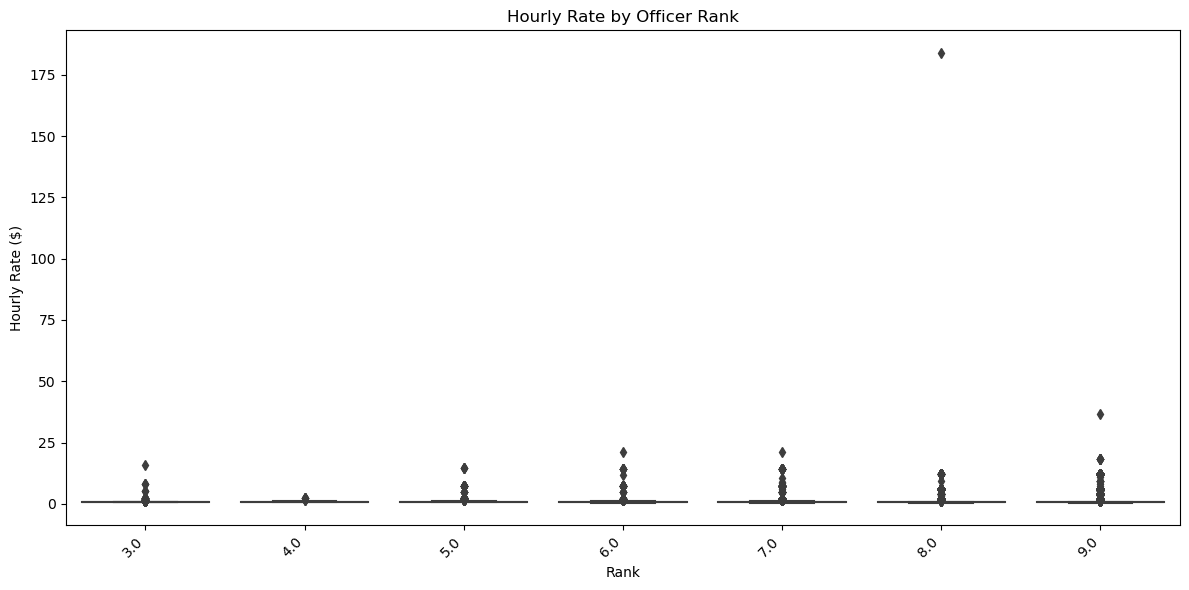

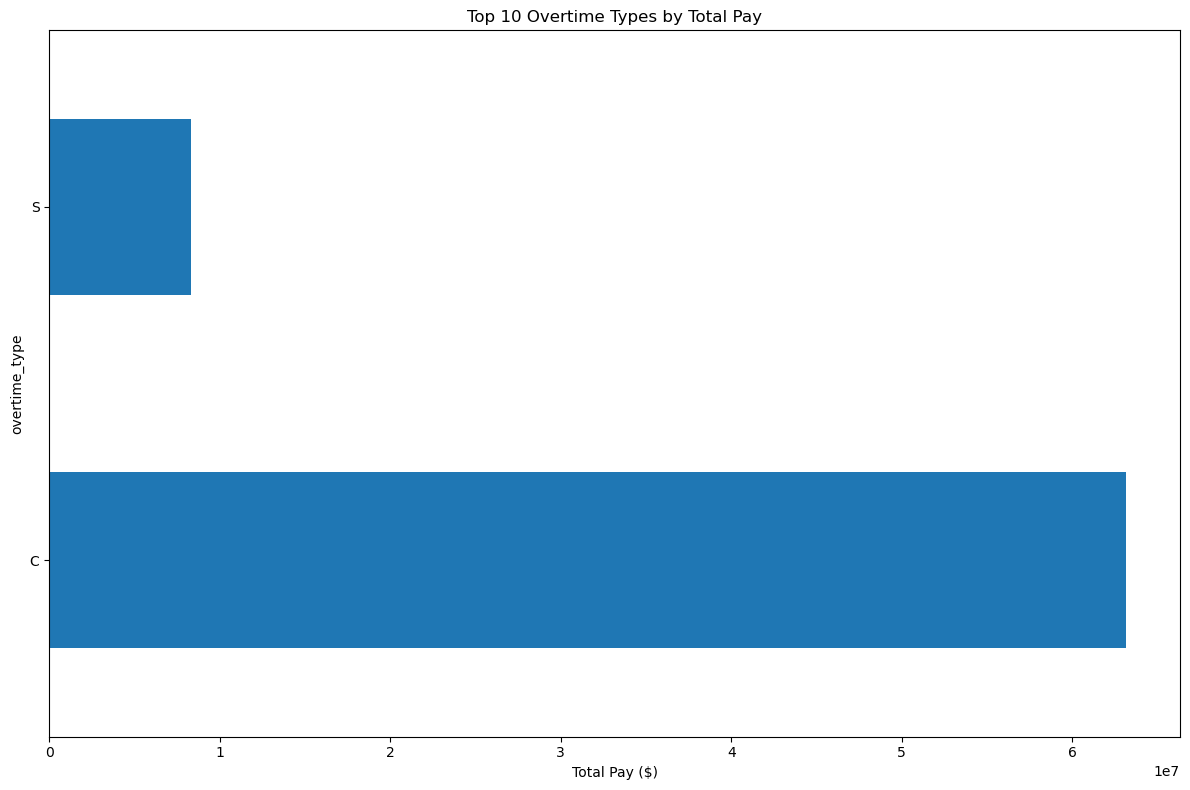

In [62]:
# Only analyze rows where Pay_Amount is available
payment_df = df.dropna(subset=['Pay_Amount'])
print(f"Percentage of rows with payment data: {len(payment_df) / len(df) * 100:.2f}%")

if len(payment_df) > 0:
    # Calculate hourly rate
    payment_df['hourly_rate'] = payment_df['Pay_Amount'] / payment_df['hours_worked']
    
    # Visualize hourly rate by rank
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='officer_rank', y='hourly_rate', data=payment_df)
    plt.title('Hourly Rate by Officer Rank')
    plt.xlabel('Rank')
    plt.ylabel('Hourly Rate ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Top earning overtime types
    type_earnings = payment_df.groupby('overtime_type')['Pay_Amount'].sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 8))
    type_earnings.head(10).plot(kind='barh')
    plt.title('Top 10 Overtime Types by Total Pay')
    plt.xlabel('Total Pay ($)')
    plt.tight_layout()
    plt.show()

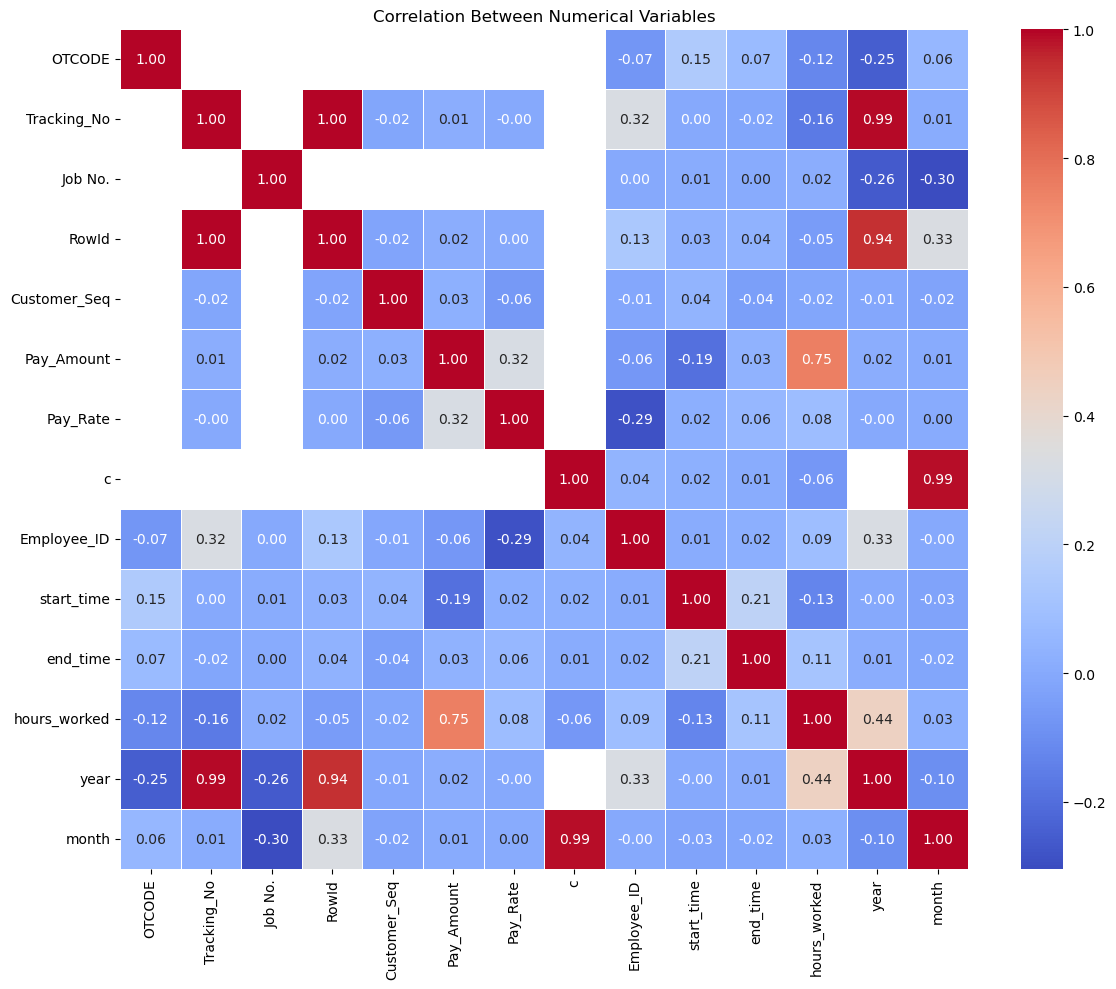

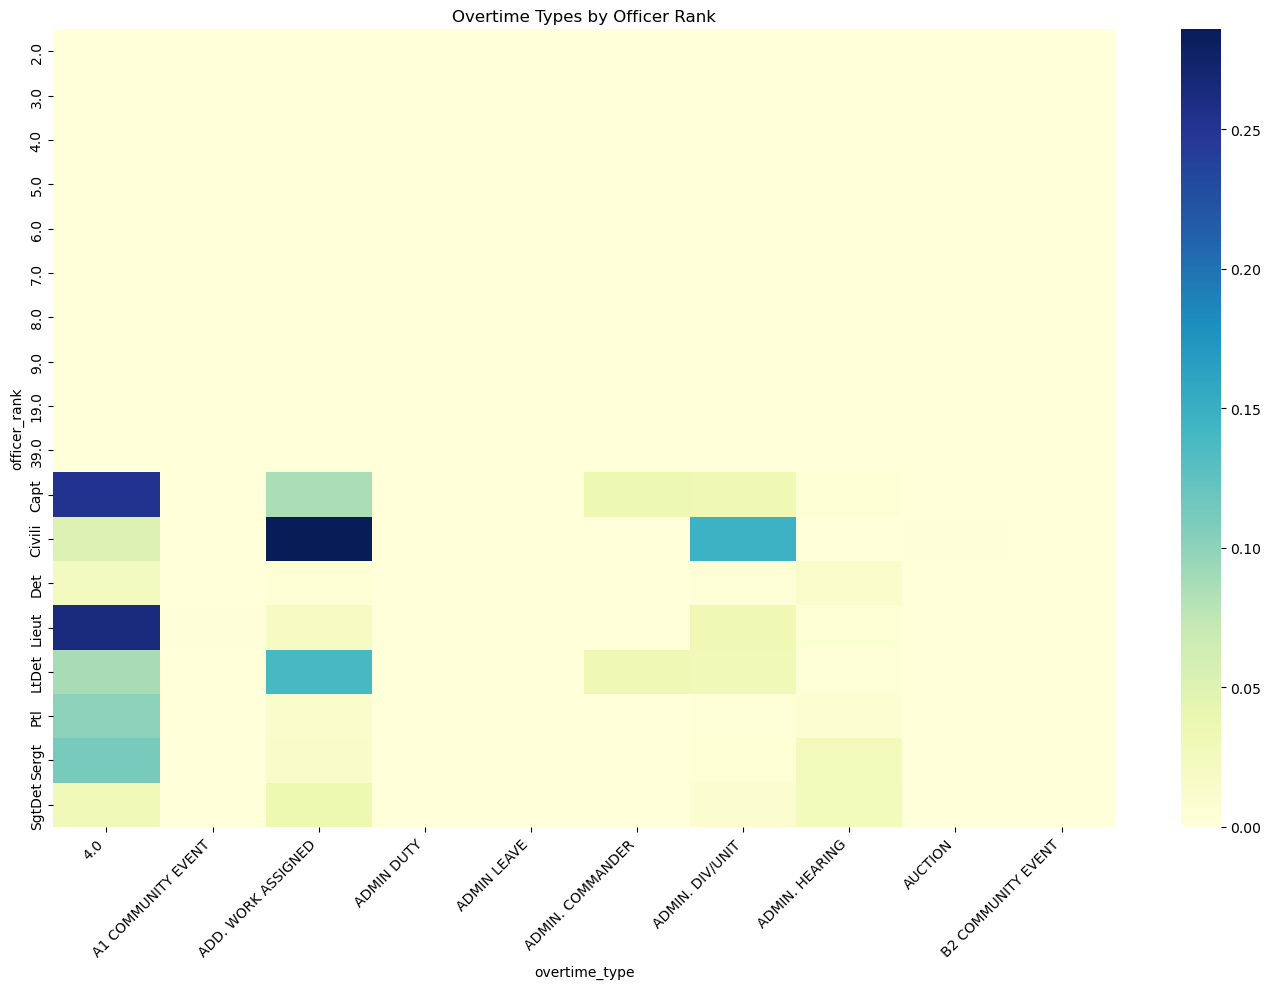

In [63]:
# Create a correlation matrix for numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Between Numerical Variables')
    plt.tight_layout()
    plt.show()

# Relationship between rank and overtime type
rank_type_crosstab = pd.crosstab(df['officer_rank'], df['overtime_type'], normalize='index')
plt.figure(figsize=(14, 10))
sns.heatmap(rank_type_crosstab.iloc[:, :10], annot=False, cmap='YlGnBu')  # First 10 columns only
plt.title('Overtime Types by Officer Rank')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Percentage of rows with customer data: 73.75%


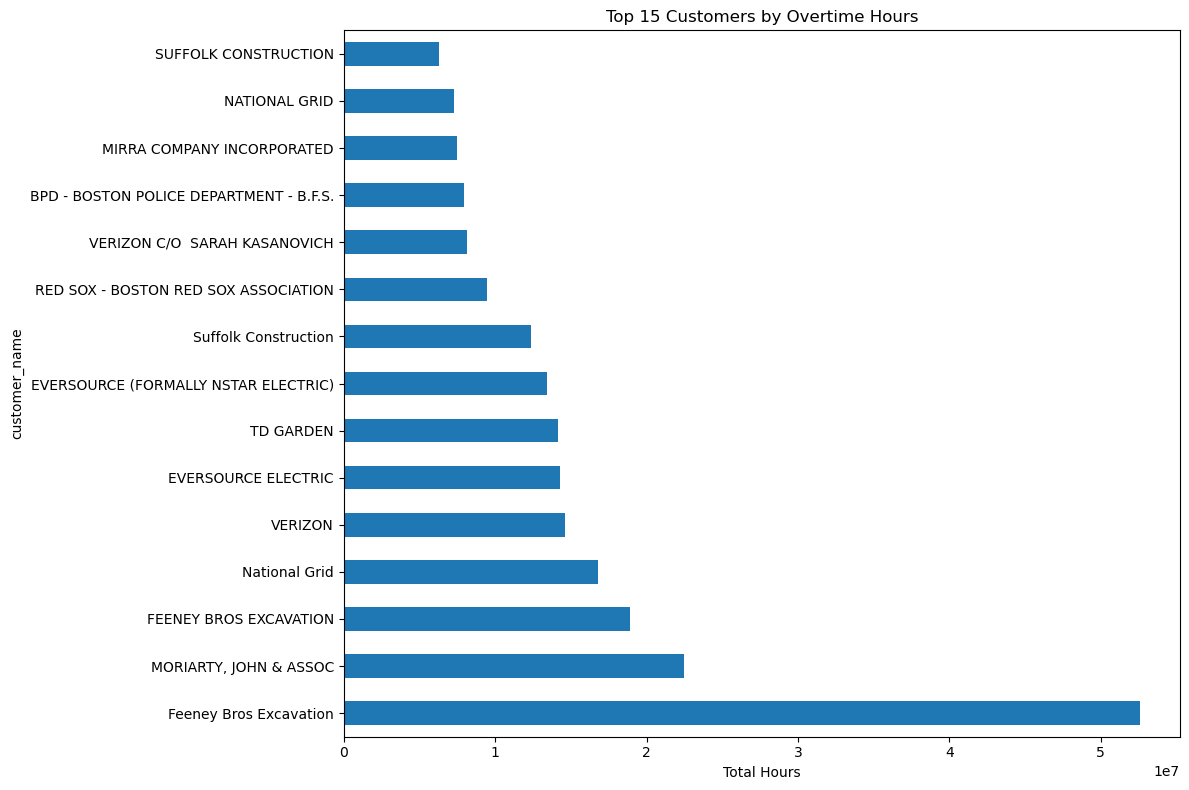


Customer number data type: object


/var/folders/2k/zvx0_bwd0wbdc5nb52hxwyxm0000gn/T/ipykernel_42318/2929906832.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['customer_number_str'] = customer_df['customer_number'].astype(str)



No clear pattern for customer categorization found.


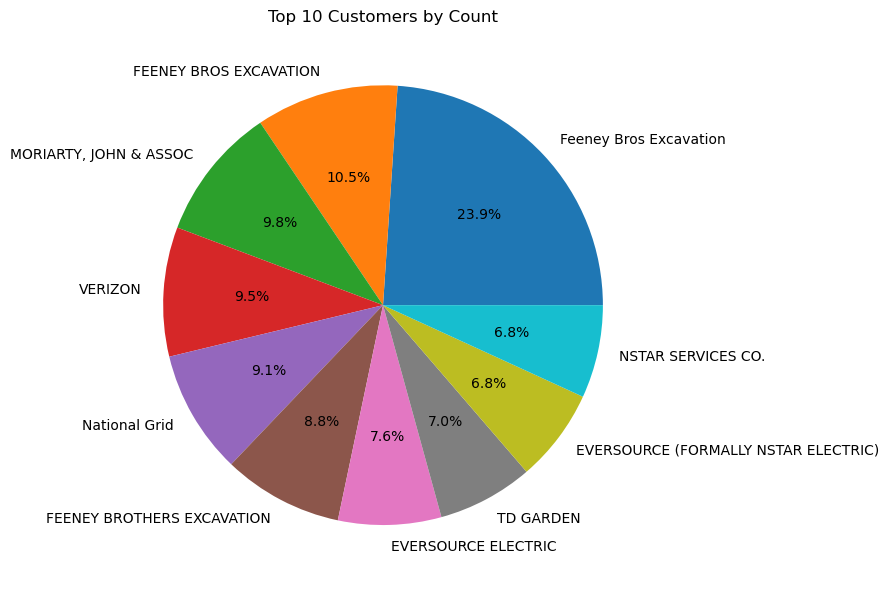

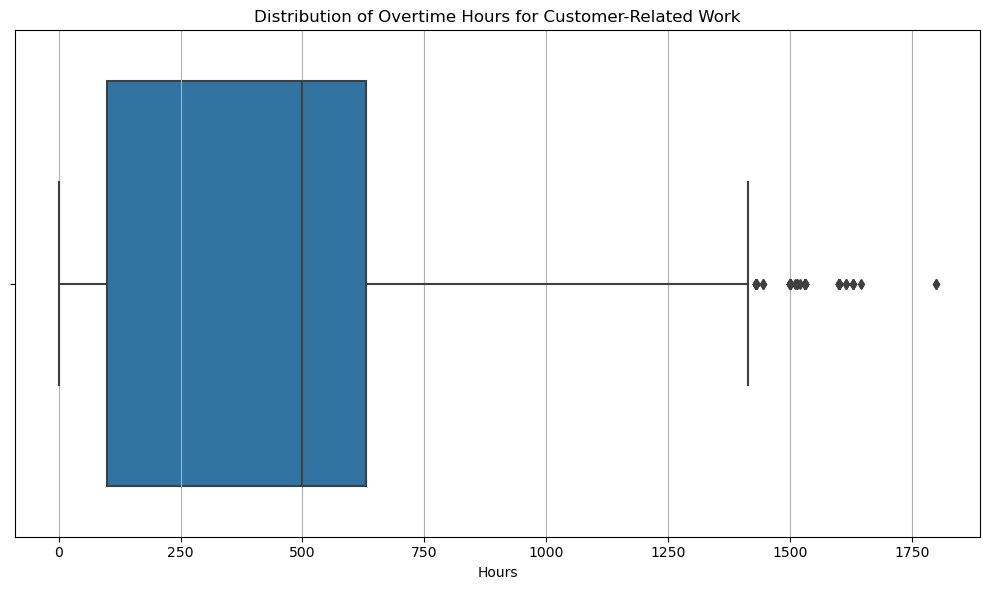


Top customer-officer relationships by hours:
customer_name                    officer_name    
Consigli Construction Co Inc     NEE,PAUL            554470.00
MORIARTY, JOHN & ASSOC           GLYNN,JOSEPH M      501480.00
JF WHITE CONTRACTING CO          GRACE,EDWARD        490445.00
BOSTON PUBLIC HEALTH COMMISSION  JENKINS,LYNWOOD     486720.00
STOP & SHOP                      BELFON,CALVIN       452675.00
MORIARTY, JOHN & ASSOC           MILIEN,ROCHEFORT    431170.00
Suffolk Construction             LENANE,TIMOTHY      419120.00
BANK OF AMERICA                  SHEA,MATTHEW G      396132.00
Feeney Bros Excavation           KAYES,GEORGE T      380125.00
SHEERIN CONSTRUCTION             LEE,WAIMAN          361542.25
Name: hours_worked, dtype: float64


In [66]:
# Only use data where customer information is available
customer_df = df.dropna(subset=['customer_name'])
print(f"Percentage of rows with customer data: {len(customer_df) / len(df) * 100:.2f}%")

if len(customer_df) > 0:
    # Top customers by hours
    top_customers = customer_df.groupby('customer_name')['hours_worked'].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 8))
    top_customers.head(15).plot(kind='barh')
    plt.title('Top 15 Customers by Overtime Hours')
    plt.xlabel('Total Hours')
    plt.tight_layout()
    plt.show()
    
    # Check data type of customer_number
    if 'customer_number' in customer_df.columns:
        print(f"\nCustomer number data type: {customer_df['customer_number'].dtype}")
        
        # Convert to string if it's not already
        try:
            customer_df['customer_number_str'] = customer_df['customer_number'].astype(str)
            
            # Now attempt to categorize if it looks like there's a pattern
            if customer_df['customer_number_str'].str.contains('-').any():
                customer_types = customer_df['customer_number_str'].str.split('-').str[0].value_counts()
                plt.figure(figsize=(10, 6))
                customer_types.head(10).plot(kind='pie', autopct='%1.1f%%')
                plt.title('Top 10 Customer Types')
                plt.ylabel('')
                plt.tight_layout()
                plt.show()
            else:
                # Alternative analysis if no clear pattern
                print("\nNo clear pattern for customer categorization found.")
                
                # Instead, show distribution of top customers
                plt.figure(figsize=(10, 6))
                customer_df['customer_name'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
                plt.title('Top 10 Customers by Count')
                plt.ylabel('')
                plt.tight_layout()
                plt.show()
        except:
            print("\nCould not convert customer_number to string for analysis.")
            
    # Analyze overtime hours distribution by customer
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='hours_worked', data=customer_df)
    plt.title('Distribution of Overtime Hours for Customer-Related Work')
    plt.xlabel('Hours')
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()
    
    # Top customer-officer pairs (if there are recurring relationships)
    top_relationships = customer_df.groupby(['customer_name', 'officer_name'])['hours_worked'].sum().sort_values(ascending=False)
    print("\nTop customer-officer relationships by hours:")
    print(top_relationships.head(10))